In [1]:
using AutoRisk

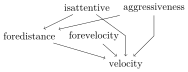

In [10]:
d = JLD.load("../../data/bayesnets/base_test.jld") 
base_bn = d["bn"]
var_edges = d["var_edges"]

d = JLD.load("../../data/bayesnets/prop_test.jld") 
prop_bn = d["bn"]

In [11]:
# build the generator
sampler = UniformAssignmentSampler(var_edges)
dynamics = Dict(:velocity=>:forevelocity)
num_veh_per_lane = 7
min_p = get_passive_behavior_params(err_p_a_to_i = .01)
max_p = get_aggressive_behavior_params(err_p_a_to_i = .01)
context = IntegratedContinuous(.1, 1)
behgen = CorrelatedBehaviorGenerator(context, min_p, max_p)
gen = BayesNetLaneGenerator(base_bn, prop_bn, sampler, dynamics, num_veh_per_lane, 
        behgen);

In [12]:
num_lanes = 3
roadway = gen_straight_roadway(num_lanes)
scene = Scene(num_veh_per_lane * num_lanes)
models = Dict{Int,DriverModel}()
rand!(gen, roadway, scene, models, 1);

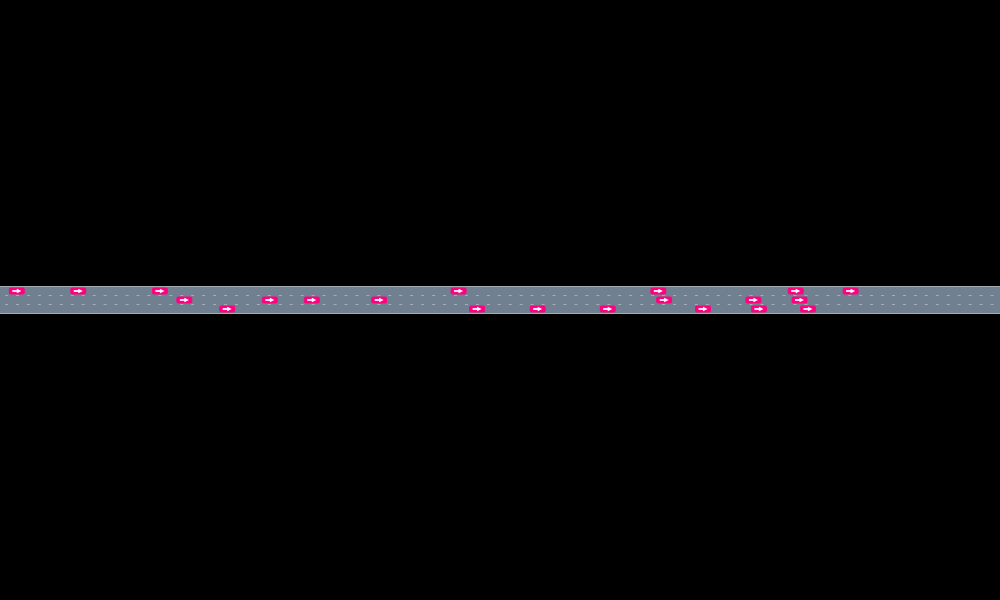

In [13]:
render(scene, roadway)